# 构建结构化多图网格

在探索中等维度数据时，经常需要在数据集的不同子集上绘制同一类型图的多个实例。这种技术有时被称为“网格”或“格子”绘图，它与[“多重小图”](https://en.wikipedia.org/wiki/Small_multiple)的概念有关。这种技术使查看者从复杂数据中快速提取大量信息。 Matplotlib 为绘制这种多轴图提供了很好的支持; seaborn 构建于此之上，可直接将绘图结构和数据集结构关系起来。

要使用网格图功能，数据必须在 Pandas 数据框中，并且必须采用 Hadley Whickam 所谓的 [“整洁”数据](https://vita.had.co.nz/papers/tidy-data.pdf)的形式。简言之，用来画图的数据框应该构造成每列一个变量，每一行一个观察的形式。

至于高级用法，可以直接使用本教程中讨论的对象，以提供最大的灵活性。一些 seaborn 函数（例如`lmplot()`，`catplot()`和`pairplot()`）也在后台使用它们。与其他在没有操纵图形的情况下绘制到特定的（可能已经存在的）matplotlib `Axes`上的“Axes-level” seaborn 函数不同，这些更高级别的函数在调用时会创建一个图形，并且通常对图形的设置方式更加严格。在某些情况下，这些函数或它们所依赖的类构造函数的参数将提供不同的接口属性，如`lmplot()`中的图形大小，你可以设置每个子图的高和宽高比。但是，使用这些对象的函数在绘图后都会返回它，并且这些对象大多都有方便简单的方法来改变图的绘制方式。

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="ticks")

## 基于一定条件的多重小图


当你想在数据集的不同子集中分别可视化变量分布或多个变量之间的关系时，[`FacetGrid`](../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid")类非常有用。 `FacetGrid`最多有三个维：`row`，`col`和`hue`。前两个与轴(axes)阵列有明显的对应关系;将色调变量`hue`视为沿深度轴的第三个维度，不同的级别用不同的颜色绘制。

首先，使用数据框初始化`FacetGrid`对象并指定将形成网格的行，列或色调维度的变量名称。这些变量应是离散的，然后对应于变量的不同取值的数据将用于沿该轴的不同小平面的绘制。例如，假设我们想要在`tips`数据集中检查午餐和晚餐小费分布的差异。

此外，`relplot()`，`catplot()`和`lmplot()`都在内部使用此对象，并且它们在完成时返回该对象，以便进一步调整。

In [3]:
tips = sns.load_dataset("tips")

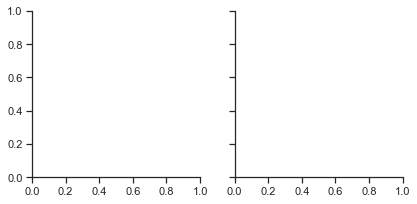

In [4]:
g = sns.FacetGrid(tips, col="time")

如上初始化网格会设置 matplotlib 图形和轴，但不会在其上绘制任何内容。

在网格上可视化数据的主要方法是 FacetGrid.map()。为此方法提供绘图函数以及要绘制的数据框变量名作为参数。我们使用直方图绘制每个子集中小费金额的分布。

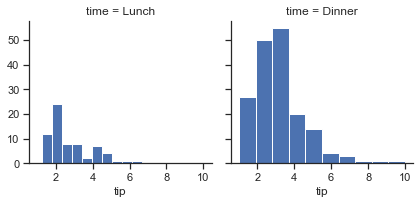

In [5]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

`map`函数绘制图形并注释轴，生成图。要绘制关系图，只需传递多个变量名称。还可以提供关键字参数，这些参数将传递给绘图函数：

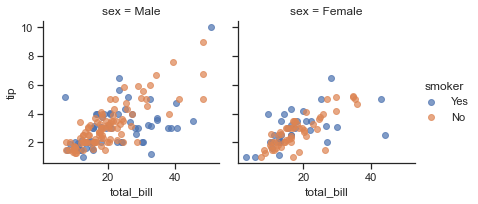

In [6]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

有几个传递给类构造函数的选项可用于控制网格外观。

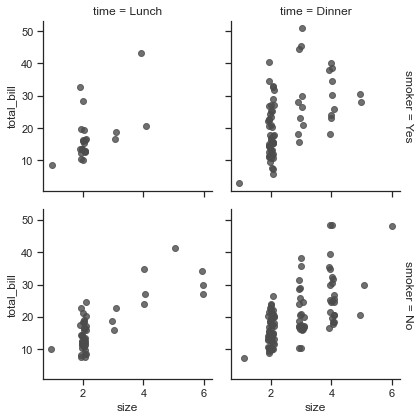

In [7]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

注意，matplotlib API 并未正式支持`margin_titles`，此选项在一些情况下可能无法正常工作。特别是，它目前不能与图之外的图例同时使用。

通过提供每个面的高度以及纵横比来设置图形的大小：

D:\Apps\Anaconda3\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


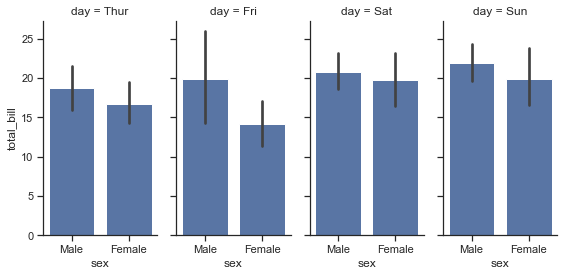

In [8]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

小图的默认排序由 DataFrame 中的信息确定的。如果用于定义小图的变量是类别变量，则使用类别的顺序。否则，小图将按照各类的出现顺序排列。但是，可以使用适当的`* _order`参数指定任意构面维度的顺序：

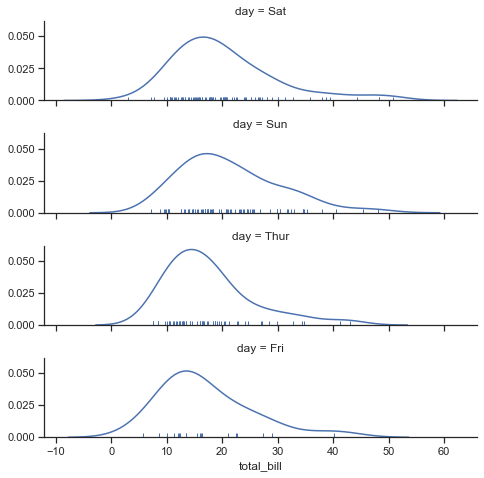

In [9]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

可以用 seaborn 调色板（即可以传递给[`color_palette()`](../generated/seaborn.color_palette.html#seaborn.color_palette "seaborn.color_palette")的东西。）还可以用字典将`hue`变量中的值映射到 matplotlib 颜色：

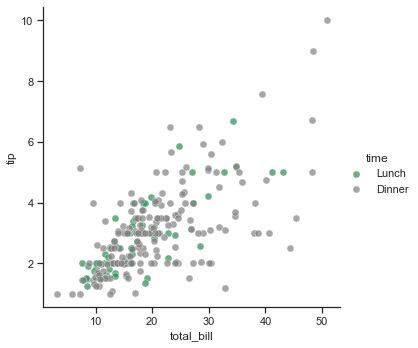

In [10]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

还可以让图的其他方面（如点的形状）在色调变量的各个级别之间变化，这在以黑白方式打印时使图易于理解。为此，只需将一个字典传递给 hue_kws，其中键是绘图函数关键字参数的名称，值是关键字值列表，每个级别为一个色调变量。

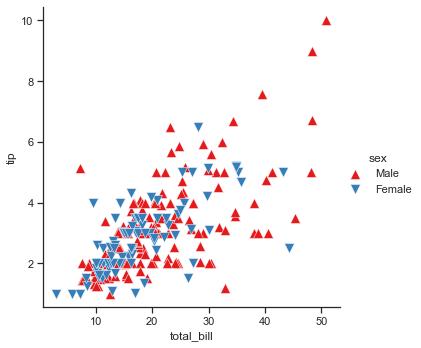

In [11]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

如果一个变量的水平数过多，除了可以沿着列绘制之外，也可以“包装”它们以便它们跨越多行。执行此 wrap 操作时，不能使用`row`变量。

D:\Apps\Anaconda3\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


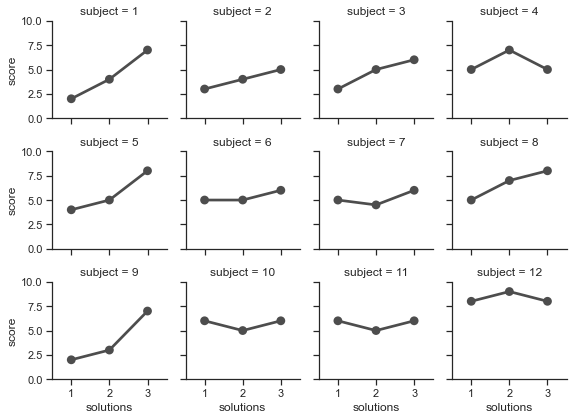

In [12]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

使用[`FacetGrid.map()`](../generated/seaborn.FacetGrid.map.html#seaborn.FacetGrid.map "seaborn.FacetGrid.map") （可以多次调用）绘图后，你可以调整绘图的外观。 `FacetGrid`对象有许多方法可以在更高的抽象层次上操作图形。最一般的是`FacetGrid.set()`，还有其他更专业的方法，如`FacetGrid.set_axis_labels()`，它们都遵循内部构面没有轴标签的约定。例如：

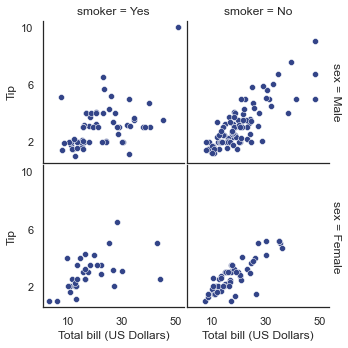

In [13]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

对于需要更多自定义的情形，你可以直接使用底层 matplotlib 图形`Figure`和轴`Axes`对象，它们分别作为成员属性存储在`Figure`和轴`Axes`（一个二维数组）中。在制作没有行或列刻面的图形时，你还可以使用`ax`属性直接访问单个轴。

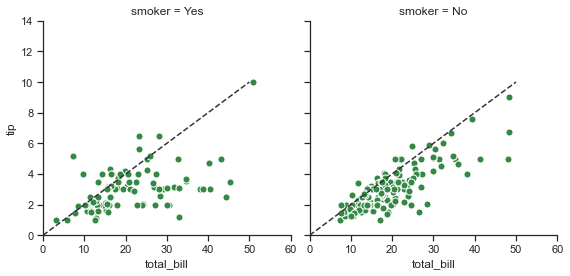

In [14]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

## 使用自定义函数

使用[`FacetGrid`](../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid")时，你除了可以使用现有的 matplotlib 和 seaborn 函数，还可以使用自定义函数。但是，这些函数必须遵循一些规则：

1. 它必须绘制到“当前活动的”matplotlib 轴`Axes`上。 `matplotlib.pyplot`命名空间中的函数就是如此。如果要直接使用当前轴的方法，可以调用`plt.gca`来获取对当前`Axes`的引用。
2. 它必须接受它在位置参数中绘制的数据。在内部，[`FacetGrid`](../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid")将为传递给[`FacetGrid.map()`](../generated/seaborn.FacetGrid.map.html#seaborn.FacetGrid.map "seaborn.FacetGrid.map")的每个命名位置参数传递一`Series`数据。
3. 它必须能接受`color`和`label`关键字参数，理想情况下，它会用它们做一些有用的事情。在大多数情况下，最简单的方法是捕获`** kwargs`的通用字典并将其传递给底层绘图函数。

让我们看一下自定义绘图函数的最小示例。这个函数在每个构面采用一个数据向量：

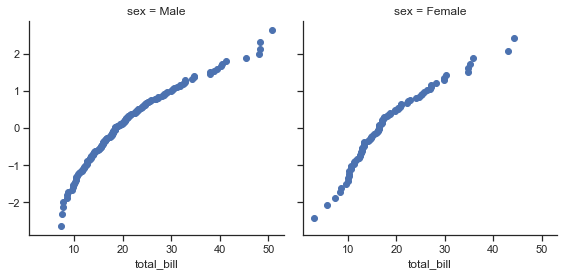

In [15]:
from scipy import stats
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill");

如果你想要制作一个双变量图，编写函数则应该有分别接受 x 轴变量，y 轴变量的参数：

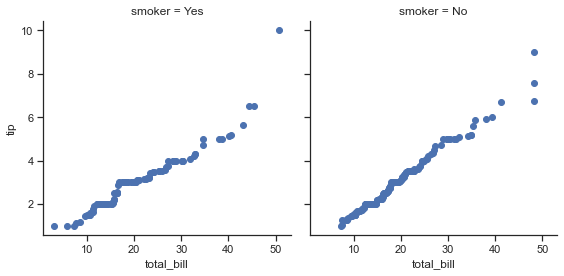

In [16]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip");

因为`plt.scatter`接受颜色和标签关键字参数并做相应的处理，所以我们可以毫无困难地添加一个色调构面：

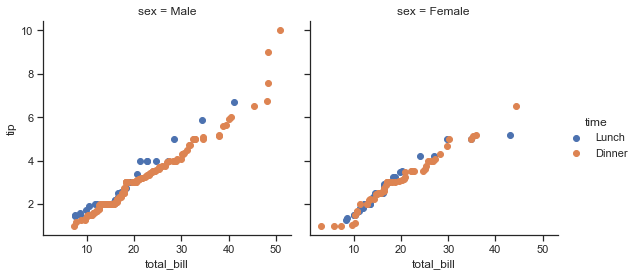

In [17]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend();

这种方法还允许我们使用额外的美学元素来区分色调变量的级别，以及不依赖于分面变量的关键字参数：

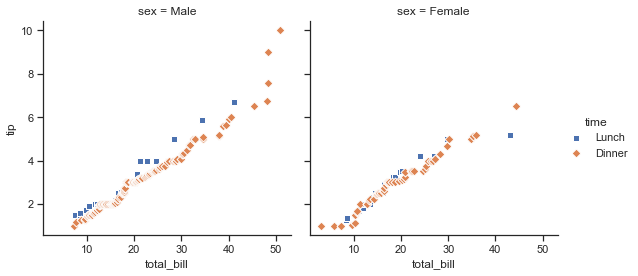

In [18]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend();

有时候，你需要使用`color`和`label`关键字参数映射不能按预期方式工作的函数。在这种情况下，你需要显式捕获它们并在自定义函数的逻辑中处理它们。例如，这种方法可用于映射`plt.hexbin`，使它与[`FacetGrid`](../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid") API 匹配：

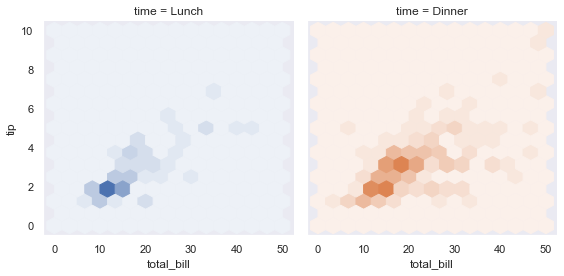

In [19]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

## 绘制成对数据关系

[`PairGrid`](../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid")允许你使用相同的绘图类型快速绘制小子图的网格。在[`PairGrid`](../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid")中，每个行和列都分配给一个不同的变量，结果图显示数据集中的每个对变量的关系。这种图有时被称为“散点图矩阵”，这是显示成对关系的最常见方式，但是[`PairGrid`](../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid")不仅限于散点图。

了解[`FacetGrid`](../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid")和[`PairGrid`](../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid")之间的差异非常重要。前者每个构面显示以不同级别的变量为条件的相同关系。后者显示不同的关系（尽管上三角和下三角组成镜像图）。使用[`PairGrid`](../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid")可为你提供数据集中有趣关系的快速，高级的摘要。

该类的基本用法与[`FacetGrid`](../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid")非常相似。首先初始化网格，然后将绘图函数传递给`map`方法，并在每个子图上调用它。还有一个伴侣函数， [`pairplot()`](../generated/seaborn.pairplot.html#seaborn.pairplot "seaborn.pairplot") ，可以更快的绘图。

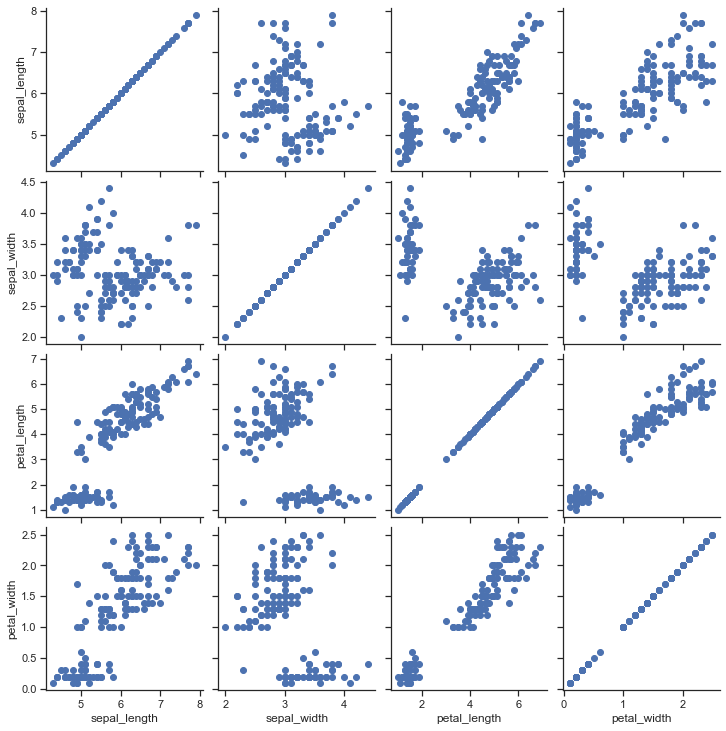

In [20]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

可以在对角线上绘制不同的函数，以显示每列中变量的单变量分布。但请注意，轴刻度与该绘图的计数或密度轴不对应。

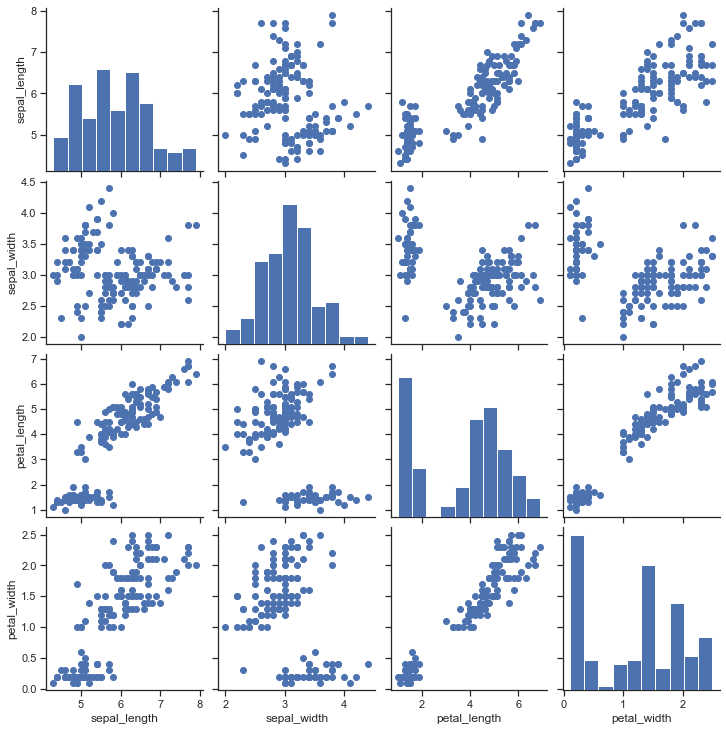

In [21]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

此图的一种常见用法是通过单独的分类变量对观察结果进行着色。例如，iris 数据集三种不同种类的鸢尾花都有四种测量值，因此你可以看到不同花在这些取值上的差异。

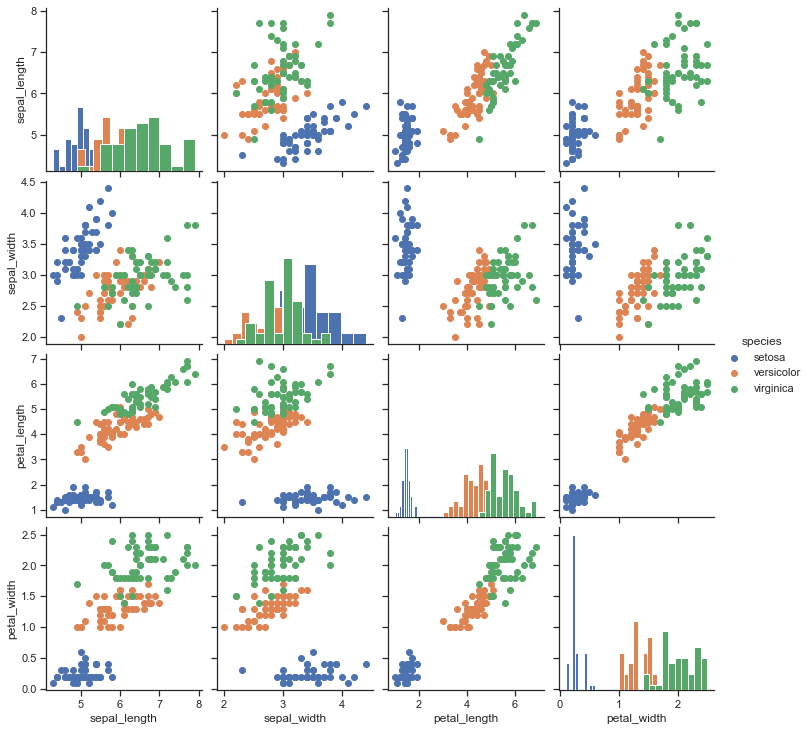

In [22]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

默认情况下，使用数据集中的每个数值列，但如果需要，你可以专注于特定列。

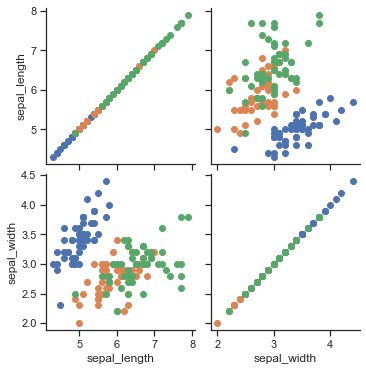

In [23]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

也可以在上三角和下三角中使用不同的函数来强调关系的不同方面。

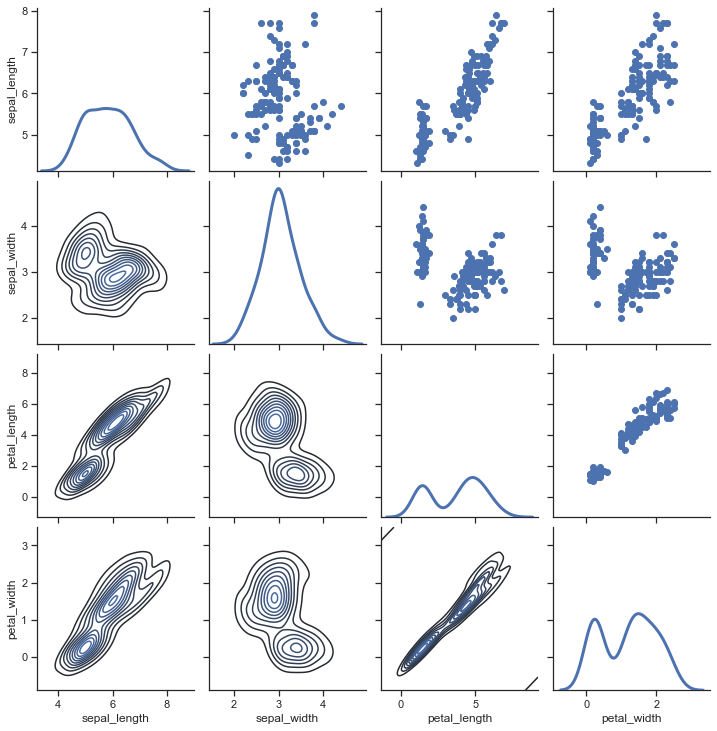

In [24]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

对角线上具有单位关系的方形网格实际上只是一种特殊情况，你也可以在行和列中使用不同的变量进行绘图。

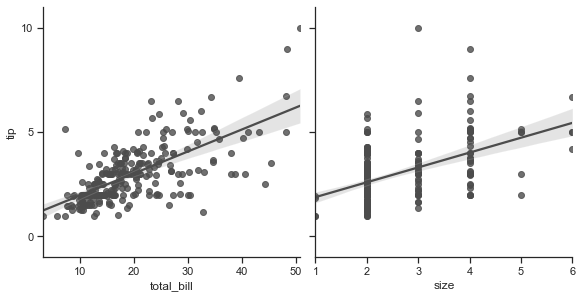

In [25]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);

当然，美学属性是可配置的。例如，你可以使用不同的调色板（例如，显示色调变量的顺序）并将关键字参数传递到绘图函数中。

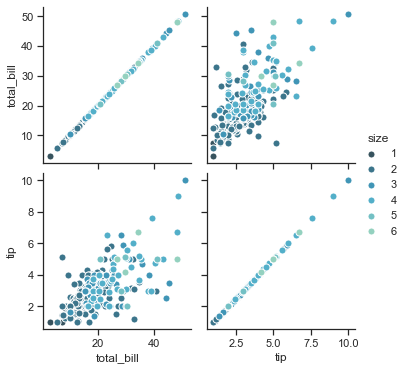

In [26]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

[`PairGrid`](../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid")很灵活，但要快速查看数据集，使用[`pairplot()`](../generated/seaborn.pairplot.html#seaborn.pairplot "seaborn.pairplot")更容易。此函数默认使用散点图和直方图，但会添加一些其他类型（目前，你还可以绘制非对角线上的回归图和对角线上的 KDE）。

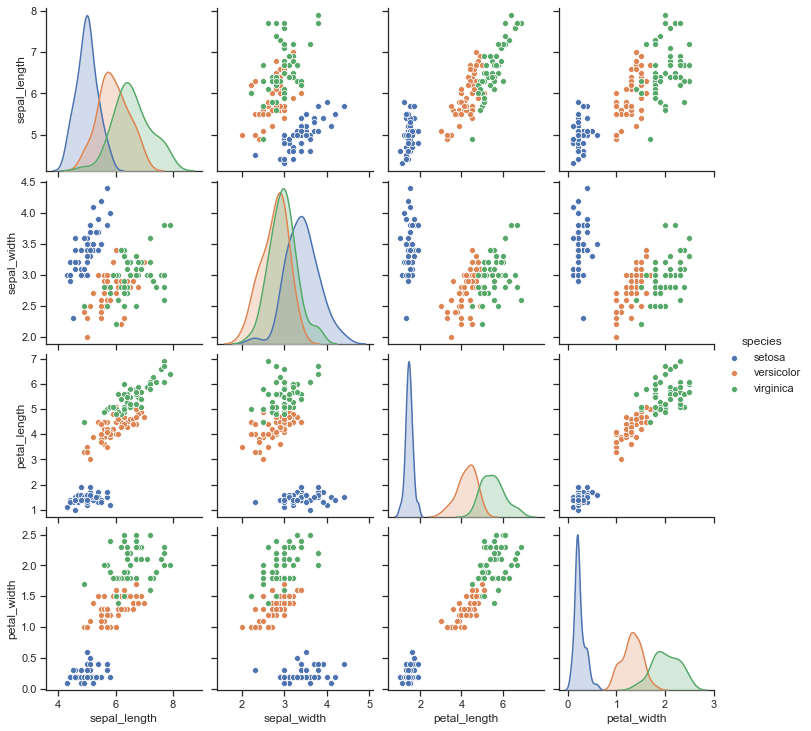

In [27]:
sns.pairplot(iris, hue="species", height=2.5);

还可以使用关键字参数控制绘图的美观，函数会返回[`PairGrid`](../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid")实例以便进一步调整。

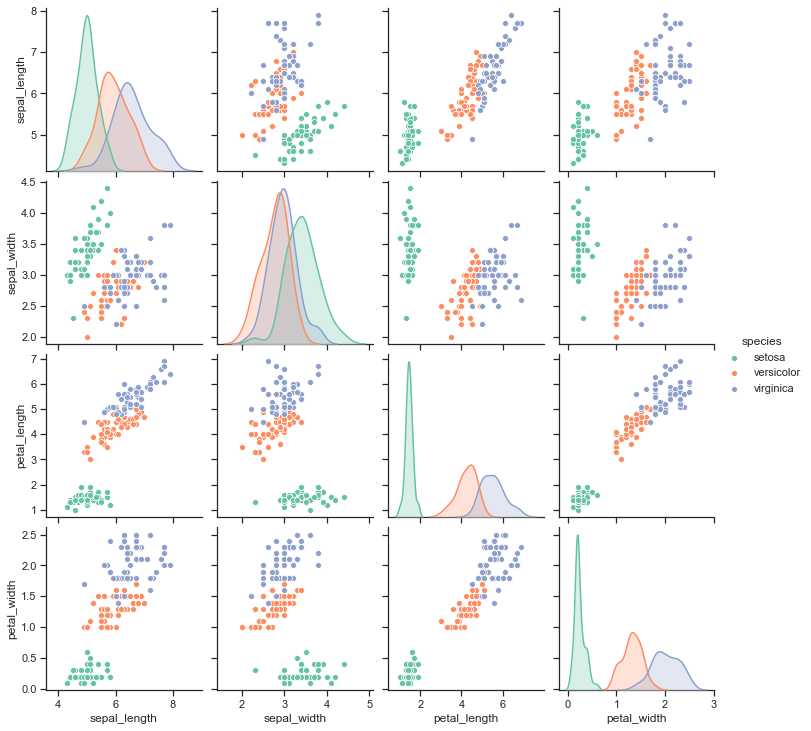

In [28]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=2.5)